
<div style="display:block"><br><br>
    <div style="display:block" align=left display=block>
        <font size=5><b>Day4 - HandsOn2: Ensemble Models</b></font><br>
        <hr/>

</div>

<pre>
.
├── Dataset
│
├── Ensemble Models
│
├── Decision Trees Vs Ensemble Models
│
└── Overfitting/Underfitting
</pre>

The sections marked with a Thinking Emoji (💭) are those which you need to read and answer. All right, without further ado, let's get started!
______________________________________

## Import Modules/Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

___________________________________

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `pima-indians-diabetes.csv` file. This dataset describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within five years. Features of this dataset are described below:


| Feature | Description |
| :- | :- |
|preg   |  Number of times pregnant
|plas   | Plasma glucose concentration a 2 hours in an oral glucose tolerance test
|pres  | Diastolic blood pressure (mm Hg)
|skin   |  Triceps skin fold thickness (mm)
| test  |  2-Hour serum insulin (mu U/ml)
| mass   | Body mass index (weight in kg/(height in m)^2)
| pedi | Diabetes pedigree function
| ages | Age (years)
| Class | Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)






read dataset in code cell below, considering the parameter `header` to be `None` and rename columns name due to the table below

In [ ]:
# read dataset
df = pd.read_csv("pima-indians-diabetes.csv", header=None)
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#rename columns names
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'ages', 'class']
df.columns = col_names
df.head()

,preg,plas,pres,skin,test,mass,pedi,ages,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 📖 EDA
first we want you to do some preprocessing on the dataset.

#### 💭 Questions
- plot frequency of each class label
- check if there is any missing values in dataset
- plot a sub plot of histogram for each feature by considering `kde` paremeter to be True seperating data of each class. look for `outliers` in each feature.
- As shown in the previos question, the ratio of the value of zero in the `preg`, `plas`, `pres`, `skin`, `test`, `mass` and `ages` features seems to be high. Let's change the corresponding values to the mean value of each feature.
- plot again the hsitogram of each feature. do you notice any changes?
- plot a `paiplot` to investigate the correlation between features.


**Write the answer below:**

<AxesSubplot:>

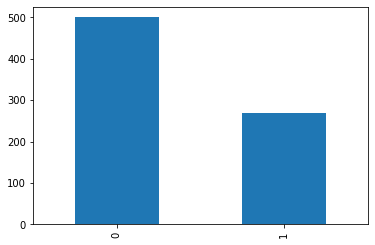

In [ ]:
# plot class frequency
df['class'].value_counts().plot(kind='bar')

In [ ]:
# check for NaN values
df.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
ages     0
class    0
dtype: int64

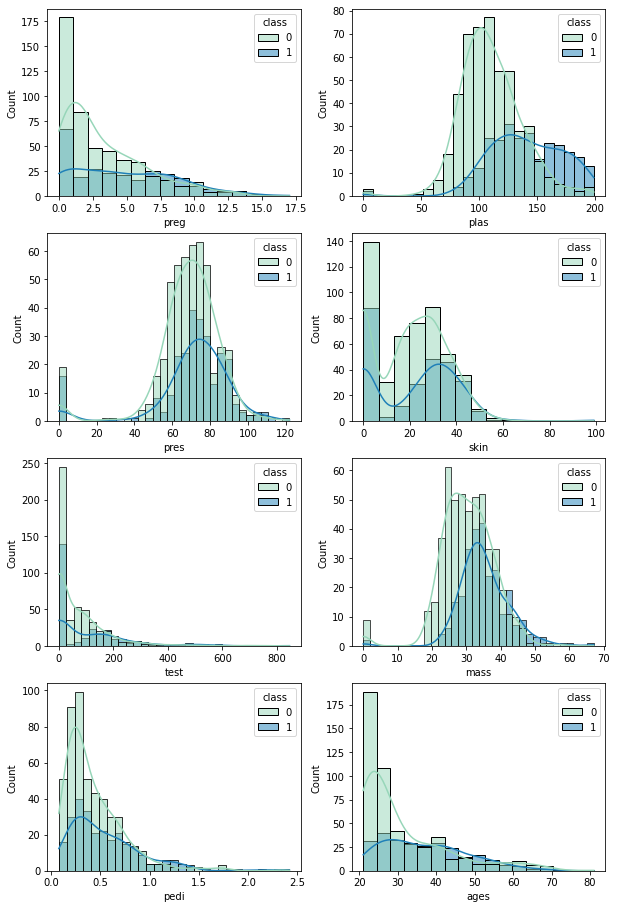

In [ ]:
# plot histogram in subplots
plt.figure(figsize=(10, 20))
i = 1;
for name in df.columns[:-1]:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="class",kde=True,palette="YlGnBu")
    i = i + 1

In [ ]:
# change zeros with means
zero_features = ['preg','plas','pres','skin',"test",'mass', 'ages']
diabetes_mean = df[zero_features].mean()
df[zero_features]=df[zero_features].replace(0, diabetes_mean)

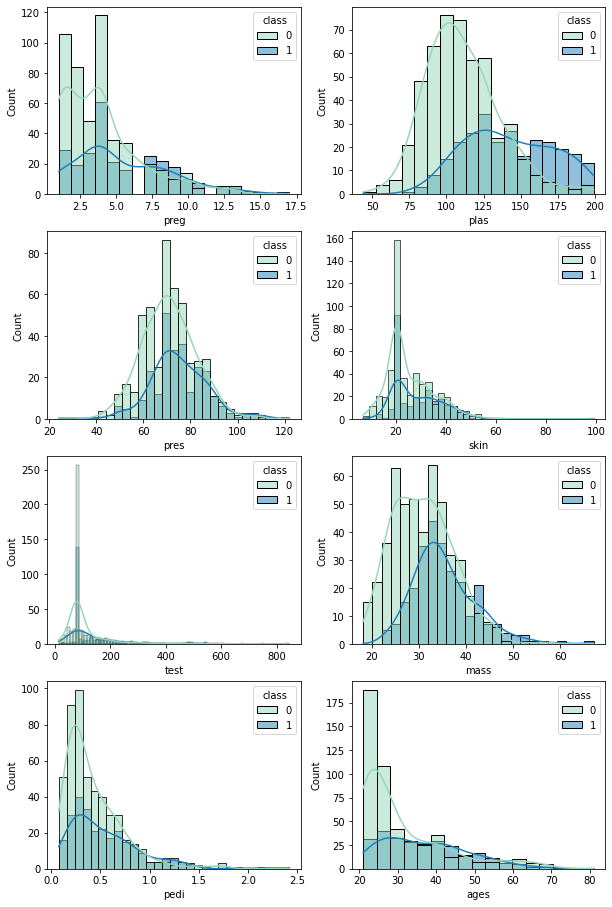

In [ ]:
# plot histogram again
plt.figure(figsize=(10, 20))
i = 1;
for name in df.columns[:-1]:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="class",kde=True,palette="YlGnBu")
    i = i + 1

<Figure size 720x576 with 0 Axes>

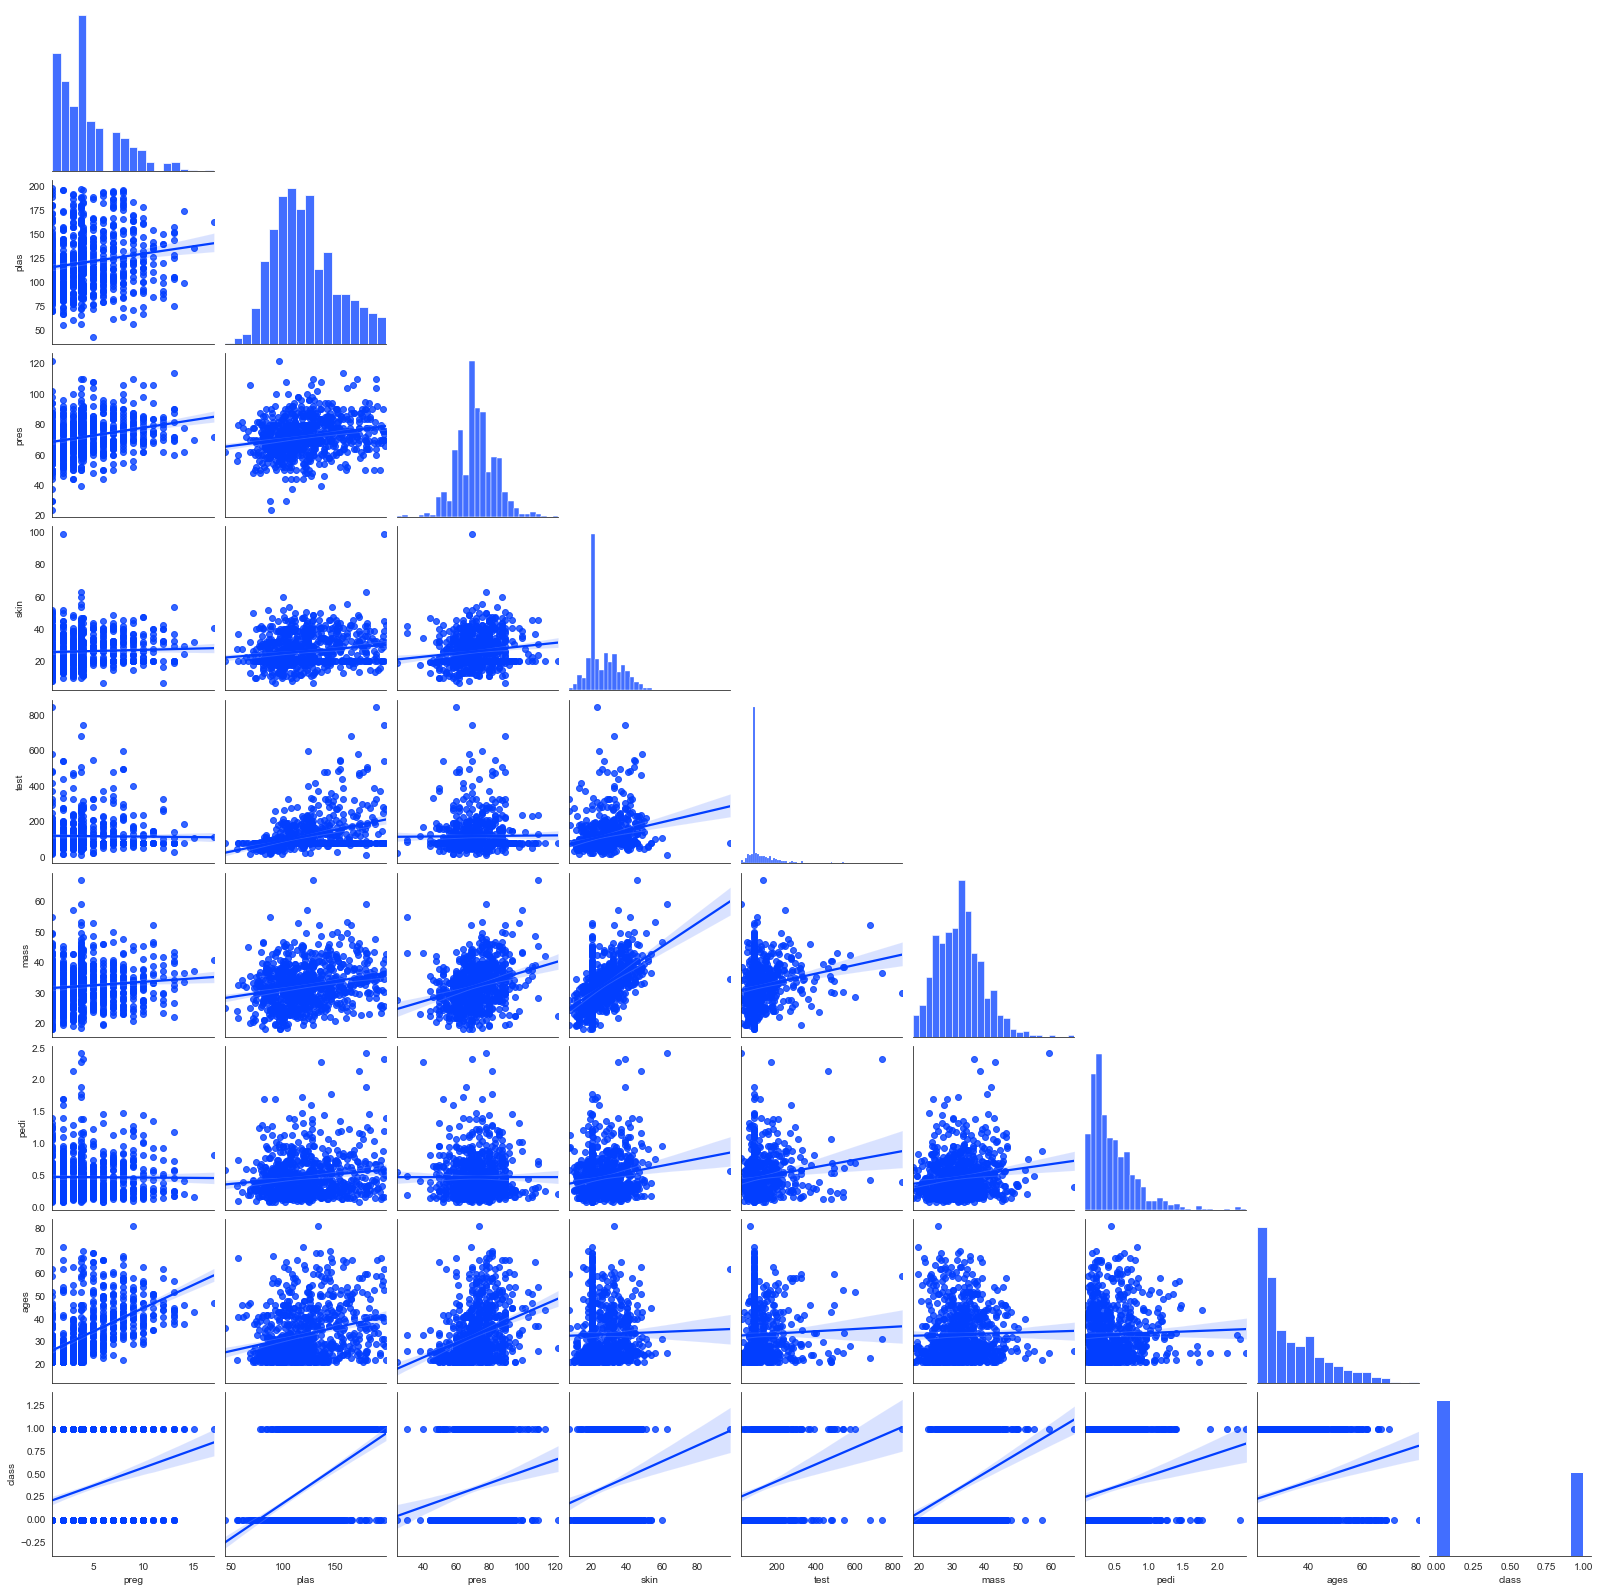

In [ ]:
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(df,kind = 'reg',corner = True,palette ='YlGnBu' )

____________________________

## Ensemble Models

In this secton we are going to get fimiliar with different types of ensemble models. Ensemble learning works by aggregating the predictions of a group of predictors, the results will be best than the best predictor alone, this group of predictors called ensemble and the technique called ensemble learning. For example we can train an ensemble of Decision Tree Classifiers each of then is trained on different subsets of the training dataset, and the class that has the most votes will be the final prediction to this ensemble of trees, this ensemble is called -> Random Forest Algorithm. Using independent predictors make the ensemble methods give better predictions, to get an independent predictors you can use different algorithms. Different algorithms will make different types of errors.

### 📖 Prepare Data for classification
to do classification we need train and test data to be splitted.

#### 💭 Questions
- split feature vectors and traget variables into two seperate variable `X` and `y`.
- split data in to train and test with proportion of 80 to 20.


**Write the answer below:**

In [ ]:
# create x and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### 📖 Random Forests
It is an ensemble of Decision Tree Classifiers that trained using the bagging or the pasting methods. The Random Forest Classifier has hyperparameters of both Decision Tree Classifier and the bagging method, instead of searching for the best test at each node in the whole datasets like Decision Tree Classifiers, Random Forests search for the best test in a random subsets of the datasets which introduce more randomness.

#### 💭 Questions
- define a random forest classifiers with 20 estimatiors. set `max_leaf_nodes` to 15, `max_samples` to 100, and `bootstrap` to False.
- train the model on your train data.
- predict labels for test data.
- print a classification report.


**Write the answer below:**

In [ ]:
# define random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=20, max_leaf_nodes=15, bootstrap=False,  max_samples=100)

In [ ]:
# Train the moedl
rf_preds = rf_model.fit(X_train, y_train)

In [ ]:
# predict labels
rf_preds = rf_model.predict(X_test)

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.72      0.43      0.53        54

    accuracy                           0.74       154
   macro avg       0.73      0.67      0.68       154
weighted avg       0.74      0.74      0.72       154



### 📖 Voting Classifiers
Voting method works by training some number predictors and the aggregate the predictions of each classifier, the final prediction is the class with the most votes, this method is called Hard Voting Classification .

#### 💭 Questions
- define a `logistic regression`, a `SVM` and a `RandomForest` classifier.
- create  a `voting classifier` by setting the `voting` parameter to be `hard`.
- train the model on your train data.
- predict labels for test data.
- print a classification report.


**Write the answer below:**

In [ ]:
# define individual models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr_classifier = LogisticRegression(max_iter=300)
rf_classifier = RandomForestClassifier()
svc = SVC()

In [ ]:
# create a voting classifier
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(
                                estimators = [('lr', lr_classifier ), ('rf', rf_classifier ), ('svc ', svc )],
                                 voting='hard')

In [ ]:
# Train Model
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=300)),
                             ('rf', RandomForestClassifier()),
                             ('svc ', SVC())])

In [ ]:
# Predict labels
voting_preds = voting_classifier.predict(X_test)

In [ ]:
# print a classification Report
print(classification_report(y_test, voting_preds))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       100
           1       0.81      0.48      0.60        54

    accuracy                           0.78       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.79      0.78      0.76       154



### 📖 Bagging and Pasting
We can use the same classifier, but training them on different subsets of the training dataset, if the sampling was with replacement the method is called `bagging`, while if the sampling was without replacement the method is called `pasting` , the final prediction is made by aggregating the predictions of all predictors (most frequent prediction).

#### 💭 Questions
- Create a Bagging classfier which has 100 `logistic regression` estimators by enabling `Bootstrapping` parameter to be True.
- train the model on your train data.
- predict labels for test data.
- print a classification report.


**Write the answer below:**

In [ ]:
# create bagging classifier
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(LogisticRegression(max_iter=300),
                                                                 n_estimators = 100, bootstrap=True)

In [ ]:
# Train the Model
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=300),
                  n_estimators=100)

In [ ]:
# Predict Labels
bagging_preds = bagging_classifier.predict(X_test)

In [ ]:
# Print classification Report
print(classification_report(y_test, bagging_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



### 📖 AdaBoost
One if the most popular Boosting ensemble methods is the AdaBoost , each predictor will give more attention to the predecessor underfit, by increasing the relative weights of the mislabeled instances, and this updated weights will be used by the next predictor for training and prediction. This process will be repeated until the last predictor.

#### 💭 Questions
- Create a Adaboost classfier which has 100 `logistic regression` estimators, set the learning rate to be `0.1` and choose the `SAMME.R` as `algorithm`.
- train the model on your train data.
- predict labels for test data.
- print a classification report.


**Write the answer below:**

In [ ]:
# define adaboost model
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=300),
                                                                  n_estimators=100,  learning_rate=0.1,
                                                                  algorithm='SAMME.R')


In [ ]:
# Train Model
adaboost_model .fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=300),
                   learning_rate=0.1, n_estimators=100)

In [ ]:
# predict labels
adaboost_preds = adaboost_model.predict(X_test)

In [ ]:
# Print classification Report
print(classification_report(y_test, bagging_preds))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.54      0.63        54

    accuracy                           0.78       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.78      0.78      0.77       154



### 📖 Gradient Boosting
Just like the AdaBoost the predictors are trained sequentially each predictor try to correct the one before it, but rather that updating the weights Gradient Boosting fit the new predictor to the residual errors that made by the previous predictor.

#### 💭 Questions
- Create a Gradient Boosting classfier which has 100 estimators, set the learning rate to be `0.01` and choose the `5` as `max depth`.
- train the model on your train data.
- predict labels for test data.
- print a classification report.


**Write the answer below:**

In [ ]:
# Define Model
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(n_estimators=500,
                                                                                              learning_rate=0.01,
                                                                                              max_depth=5)

In [ ]:
# Train Model
gradient_boosting_model.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

In [ ]:
# predict Labels
gboost_preds = gradient_boosting_model.predict(X_test)

In [ ]:
# classification Report
print(classification_report(y_test, gboost_preds))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       100
           1       0.74      0.57      0.65        54

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.77      0.78      0.77       154



_____________________________________

## Decision Trees Vs Ensemble Models

### 📖 Comparison Between Decision Tree and Ensemble Models
In this section we want to compare the performance of a decision Tree algorithm and Random Forest classifier.

#### 💭 Questions
- Define a decision Tree and a Random Forest classifier. choose parameters with respect to your pereferance.
- train both models on your train data.
- predict labels for test data.
- Compare the performance of classfiers


**Write the answer below:**

In [ ]:
# Define Models
from sklearn.tree import DecisionTreeClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_leaf_nodes=15, bootstrap=True,  max_samples=50)
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# Train Models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# predict labels on test data
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

In [ ]:
# Print classification Report
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       100
           1       0.81      0.39      0.53        54

    accuracy                           0.75       154
   macro avg       0.77      0.67      0.68       154
weighted avg       0.77      0.75      0.73       154



In [ ]:
# Print classification Report
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



_________________________________

## Overfitting/Underfitting

### 📖 Comparison Between Decision Tree and Ensemble Models
In this section we want to investigate the role of parameters in overfitting/underfitting in a Random Forest classifier.

#### 💭 Questions
- for number of estimators from `1` to `100` in random forest classifier plot the accuracy for training set and test set.
- for number of `max_leaf_nodes` from `2` to `50` in random forest classifier plot the accuracy for training set and test set.
- for number of `max_samples` from `1` to `200` in random forest classifier plot the accuracy for training set and test set.
- can we determine best parameters from the results?


**Write the answer below:**

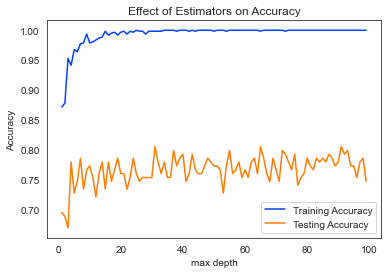

In [ ]:
# chcek for the role of estimators
from sklearn.metrics import accuracy_score

# Define the list of sample sizes to test
estimators = [i for i in range(1, 100)]

# Define an empty list to store the accuracy scores
train_accuracy = []
test_accuracy = []

for est in estimators:

    # Train a linear classifier on the subset of data
    model = RandomForestClassifier(n_estimators=est).fit(X_train, y_train)


    # Make predictions on the test set and train set and calculate the accuracy score
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


# Plot the accuracy scores as a function of sample size

plt.plot(estimators, train_accuracy, label="Training Accuracy")
plt.plot(estimators, test_accuracy , label="Testing Accuracy")
plt.xlabel('max depth')
plt.ylabel('Accuracy')
plt.title('Effect of Estimators on Accuracy')
plt.legend()
plt.show()

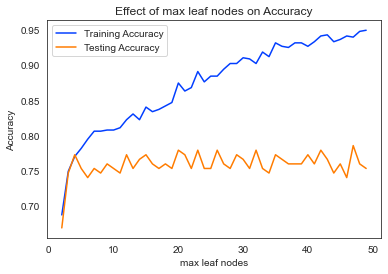

In [ ]:
# chcek for the role of max_leaf_nodes
from sklearn.metrics import accuracy_score

# Define the list of sample sizes to test
leaf_nodes = [i for i in range(2, 50)]

# Define an empty list to store the accuracy scores
train_accuracy = []
test_accuracy = []

for leaf in leaf_nodes:

    # Train a linear classifier on the subset of data
    model = RandomForestClassifier(max_leaf_nodes=leaf).fit(X_train, y_train)


    # Make predictions on the test set and train set and calculate the accuracy score
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


# Plot the accuracy scores as a function of sample size

plt.plot(leaf_nodes, train_accuracy, label="Training Accuracy")
plt.plot(leaf_nodes, test_accuracy , label="Testing Accuracy")
plt.xlabel('max leaf nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max leaf nodes on Accuracy')
plt.legend()
plt.show()

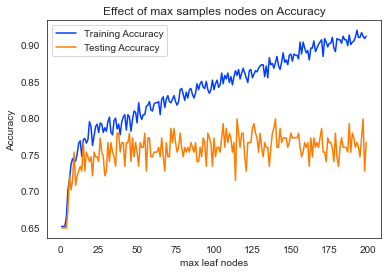

In [ ]:
# chcek for the role of max_leaf_nodes
from sklearn.metrics import accuracy_score

# Define the list of sample sizes to test
samples = [i for i in range(1, 200)]

# Define an empty list to store the accuracy scores
train_accuracy = []
test_accuracy = []

for sample in samples:

    # Train a linear classifier on the subset of data
    model = RandomForestClassifier(max_samples=sample).fit(X_train, y_train)


    # Make predictions on the test set and train set and calculate the accuracy score
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)


    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


# Plot the accuracy scores as a function of sample size

plt.plot(samples, train_accuracy, label="Training Accuracy")
plt.plot(samples, test_accuracy , label="Testing Accuracy")
plt.xlabel('max leaf nodes')
plt.ylabel('Accuracy')
plt.title('Effect of max samples nodes on Accuracy')
plt.legend()
plt.show()